In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Latar Belakang**

Sebuah perusahaan asal Indonesia baru saja melebarkan bisnisnya ke Amerika Serikat, perusahaan tersebut ingin mengenalkan perusahaan dan memasarkan produk mereka dengan menggunakan platform media sosial salah satunya yaitu Youtube.

# **Masalah**

Sebuah perusahaan ingin membuat video marketing yang dapat menjangkau banyak orang di platform Youtube, sebagai perusahaan yang berasal dari luar Amerika Serikat mereka belum mengetahui jenis video dan pengaturan apa saja yang dapat membantu video yang mereka buat dapat menjangkau banyak orang. Untuk menghindari resiko video yang gagal menjangkau banyak audiens, perusahaan ingin mengetahui bagaimana karakteristik video yang dapat menjangkau banyak audiens dengan menggunakan dataset US youtube trending.

# **Memahami data**

Pertama kita import dulu data yang akan dianalisis.

In [49]:
df=pd.read_csv('D:/USvideos.csv')

In [50]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\nPaulina Gregory\n\n\nShots Studios Channels:\nAle

Tabel di atas adalah 5 baris teratas dari dataset yang kita assign ke dalam variabel df. Tabel tersebut berisikan 16 kolom yang memuat info tentang:
1. `video_id` : kode unik dari sebuah video.
2. `trending_date` : tanggal video tersebut menempati trending youtube
3. `title` : judul dari video
4. `channel_title` : nama channel pengupload video
5. `category_id` : angka yang mewakili kategori sebuah video
6. `publish_time` : tanggal video diupload ke youtube
7. `tags` : kata kunci deskriptif yang ditambahkan ke video
8. `views` : jumlah video ditonton per tanggal trending
9. `likes` : jumlah likes yang diperoleh per tanggal trending
10. `dislikes` : jumlah dislikes yang diperoleh per tanggal trending
11. `comment_count` : jumlah comment yang ada pada video per tanggal trending
12. `thumbnail_link` : alamat sampul preview dari sebuah video
13. `comments_disabled` : video dengan comment di non-aktifkan, True jika iya False jika tidak
14. `ratings_disabled` : video dengan rating di  non-aktifkan, True jika iya False jika tidak
15. `video_error_or_removed` : video yang bermasalah atau dihapus, True jika iya False jika tidak
16. `description` : deskripsi atau penjelasan sebuah video

Kemudian mari kita lihat informasi detail dari dataset untuk memeriksa anomali yang ada pada dataset.

In [51]:
df.shape

(40949, 16)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [53]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [54]:
df.describe(include=object)

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/
freq,30,200,30,203,50,1535,30,58


In [55]:
df.isnull().sum()

video_id                  0  
trending_date             0  
title                     0  
channel_title             0  
category_id               0  
publish_time              0  
tags                      0  
views                     0  
likes                     0  
dislikes                  0  
comment_count             0  
thumbnail_link            0  
comments_disabled         0  
ratings_disabled          0  
video_error_or_removed    0  
description               570
dtype: int64

In [56]:
df.duplicated().sum()

48

In [57]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\User\AppData\Local\Temp\ipykernel_18160\3657208298.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Column Name  Number of Unique  \
0   video_id                6351               
1   trending_date           205                
2   title                   6455               
3   channel_title           2207               
4   category_id             16                 
5   publish_time            6269               
6   tags                    6055               
7   views                   40478              
8   likes                   29850              
9   dislikes                8516               
10  comment_count           13773              
11  thumbnail_link          6352               
12  comments_disabled       2                  
13  ratings_disabled        2                  
14  video_error_or_removed  2                  
15  description             6901               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Secara umum kita bisa melihat bahwa:
1. dataset US Youtube trending memiliki 16 kolom dan 40949 baris
2. Dari semua kolom, hanya kolom description yang memiliki data kosong sebanyak 570 baris yang diisi dengan NaN.
3. kolom thumbnail_link berisikan link sampul prewiew video yang tidak relevan, sehingga dihapus saja.
4. kolom channel_title berisikan data yang tidak relevan, sehingga dihapus saja.
5. kolom trending_date dan publish_time berbentuk tanggal, tetapi tipe data masih merupakan object
6. kolom video_id memiliki nilai unik sebanyak 6351, yang artinya hanya ada 6351 video, dataset memiliki 40949 baris.
7. Dalam dataset, ada 48 baris yang merupakan data duplikat
8. Dalam satu video id, ada beberapa baris yang mengindikasikan berapa lama dalam satuan hari (trending_date) video tersebut muncul di youtube trending, sehingga bukan merupakan data duplikat.

# Data Cleaning

**Data duplikat**

pertama, mari kita periksa apakah ada data duplikat di dalam dataset ini.

In [58]:
df.duplicated().sum()

48

Ditemukan 48 data duplikat yang akan dihapus

In [59]:
df.drop_duplicates(inplace=True)


In [60]:
df.reset_index(drop=True,inplace=True)

In [61]:
df.duplicated().sum()

0

48 data duplikat sudah berhasil dihapus.

**kolom yang tidak relevan**

**Kolom tags**

Melansir dari halaman Youtube Help, tags adalah keyword atau kata kunci yang dapat membantu viewer menemukan konten video kita. Akan tetapi mustahil untuk menganalisis kualitas tags satu persatu, sebaliknya saya akan melihat apakah jumlah tags dalam satu video membantu video untuk lebih mudah ditemukan.

In [62]:
tags=(df['tags'].str.split('|'))

len_tags=[]
def count_tags(x):                  # untuk menghitung tags dalam satu video
    for a in range(len(x)):
        len_tags.append(len(x[a]))

In [63]:
count_tags(tags)
df['len_tags']=len_tags

In [64]:
# Setelah dapat jumlah tags, kolom tags lebih baik dihapus
df.drop('tags',axis=1,inplace=True)


**kolom Category_id**

Kolom category_id berisikan id yang mewakili kategori atau tema dari sebuah video dalam bentuk angka. Untuk memudahkan kita memahami kategori sebuah video, saya akan mengubah angka id menjadi bentuk nama atau string.

In [65]:
category=pd.DataFrame({'category_id':[1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43],
          'category':['Film & Animation','Autos & Vehicles','Music','Pets & Animals','Sports','Travel & Events','Gaming','People & Blogs','Comedy','Entertaiment','News & Politics',
          'Howto & Style','Education','Science & Technology','Nonprofits & Activism','Shows']})    
df=df.merge(category,how='inner',on='category_id')


**Missing value: Kolom description**

In [66]:
df.isna().sum()

video_id                  0  
trending_date             0  
title                     0  
channel_title             0  
category_id               0  
publish_time              0  
views                     0  
likes                     0  
dislikes                  0  
comment_count             0  
thumbnail_link            0  
comments_disabled         0  
ratings_disabled          0  
video_error_or_removed    0  
description               569
len_tags                  0  
category                  0  
dtype: int64

Terdapat 569 missing value pada kolom description, description sendiri berfungsi untuk memberitahu algoritma youtube dan pengguna tentang isi atau topik video, deskripsi video yang unik memudahkan video ditemukan melalui youtube search. Missing value disini terjadi karena pemilik video memutuskan untuk tidak mengisi deskripsi video. Oleh karena itu, sulit untuk mengisi missing value dari kolom description karena deskripsi video bersifat subjektif dan bergantung kepada pemilik video, sebaliknya kita akan melihat proporsi video yang memiliki deskripsi dan yang tidak.

In [67]:
df['description'].fillna(False,inplace=True)
df['description'][df['description']!=False]=True
df['description']=df['description'].astype(bool,)

C:\Users\User\AppData\Local\Temp\ipykernel_18160\730589266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'][df['description']!=False]=True


**Kolom trending_date & publish_time**

kolom trending_date berisikan tanggal dari sebuah video menempati trending youtube, sedangkan publish_time berisikan tanggal dan waktu video tersebut di upload ke youtube. Disini tipe data keduanya masih berupa object, disini tipe data keduanya akan diubah menjadi tipe datetime.

In [68]:
df['trending_date']=df['trending_date'].str.replace('.','-',regex=True)   # mengubah (.) menjadi (-)
df['trending_date']=pd.to_datetime(df['trending_date'],format='%y-%d-%m') 

In [69]:
pub_time=pd.DataFrame(df['publish_time'].str.split('.').str.get(0))
pub_time['publish_time']=pub_time['publish_time'].str.replace('T',' ',regex=True)
pub_time['publish_time']=pd.to_datetime(pub_time['publish_time'])
df['publish_time']=pub_time['publish_time']

Dari kolom trending_date dan publish_time kita bisa menarik feature baru, seperti berapa lama video dapat memasuki trending page youtube sejak diupload.

In [70]:
jrk_trend=df.groupby('video_id').first()
jrk_trend=pd.DataFrame(jrk_trend['trending_date']-jrk_trend['publish_time'])
jrk_trend.reset_index()
jrk_trend.rename(columns={0:'range_to_trend'},inplace=True)
df=df.merge(jrk_trend,how='left',on='video_id')
df['range_to_trend'] = pd.to_numeric(df['range_to_trend'].dt.days, downcast='integer')




**Data yang berganda**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40900
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  int64         
 5   publish_time            40901 non-null  datetime64[ns]
 6   views                   40901 non-null  int64         
 7   likes                   40901 non-null  int64         
 8   dislikes                40901 non-null  int64         
 9   comment_count           40901 non-null  int64         
 10  thumbnail_link          40901 non-null  object        
 11  comments_disabled       40901 non-null  bool          
 12  ratings_disabled        40901 non-null  bool  

In [72]:
df.nunique()

video_id                  6351 
trending_date             205  
title                     6455 
channel_title             2207 
category_id               16   
publish_time              6269 
views                     40478
likes                     29850
dislikes                  8516 
comment_count             13773
thumbnail_link            6352 
comments_disabled         2    
ratings_disabled          2    
video_error_or_removed    2    
description               2    
len_tags                  65   
category                  16   
range_to_trend            123  
dtype: int64

Di sini data sudah hampir bersih dan siap kita gunakan. Namun jika diperhatikan, jumlah video yang ada berdasarkan title berjumlah 6455, sedangkan dataframe berisi 40901 baris. Sebelumnya kita sudah menghapus data duplikat yang ada, jadi kemungkinan adanya data duplikat adalah mustahil. Mari kita lihat dengan meng-group by salah satu video.

In [73]:
df[df['title']=='WE WANT TO TALK ABOUT OUR MARRIAGE'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,len_tags,category,range_to_trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,True,1,People & Blogs,0
17,2kyS6SvSYSE,2017-11-15,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,True,1,People & Blogs,0
32,2kyS6SvSYSE,2017-11-16,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,True,1,People & Blogs,0
47,2kyS6SvSYSE,2017-11-17,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,True,1,People & Blogs,0
62,2kyS6SvSYSE,2017-11-18,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,True,1,People & Blogs,0


Dari tabel di atas, dapat kita pahami bahwa satu video dapat memiliki beberapa data disebabkan oleh perbedaan tanggal trending serta akumulasi views, like, dan dislike. Kita bisa mencoba menarik persentase pertumbuhan views,likes, dan dislikes per hari, tetapi tidak memungkinkan karena ada video yang hanya memasuki trending sekali saja. tapi kita bisa menarik informasi berapa lama satu video bertahan di trending page youtube dengan menghitung jumlah barisnya.

In [74]:
lama_trend=pd.DataFrame(df.groupby('video_id').count()['trending_date'])
lama_trend.rename(columns={'trending_date':'lama_trending'},inplace=True)
lama_trend.reset_index(inplace=True)
df=df.merge(lama_trend,how='left',on='video_id')

Karena sudah tidak ada lagi informasi yang bisa diambil, maka disini kita akan mengambil hanya baris terakhir atau tanggal terakhir suatu video memasuki trending page youtube.

In [75]:
df=df.groupby('title').last()
df.reset_index(inplace=True)
df=df.sort_values('trending_date')

**Menghapus kolom video_id, title, channel_title, thumbnail_link, ratings_disabled, video_error_or_removed, category_id**

Keenam kolom ini tidak terlalu penting karena hanya berisikan id, nama video dan channel, serta link yang bukan merupakan metric pengukuran yang bisa kita analisis, sehingga sebaiknya dihapus saja.

In [76]:
df.drop(['video_id','channel_title','thumbnail_link','ratings_disabled','video_error_or_removed','category_id'],axis=1,inplace=True)

Terakhir, mari kita urutkan kembali urutan kolomnya agar lebih rapi dan mudah dibaca.

In [77]:
df=df[['title','category','publish_time','trending_date','views','likes','dislikes','comment_count','comments_disabled','description','len_tags','range_to_trend','lama_trending']]
df.head()

,title,category,publish_time,trending_date,views,likes,dislikes,comment_count,comments_disabled,description,len_tags,range_to_trend,lama_trending
5353,"The Oak Beams of New College, Oxford",Education,2012-06-10 19:24:38,2017-11-14,6412,49,0,2,False,True,1,1982,1
4215,Phillip Phillips - Magnetic (Audio),Music,2017-11-09 05:00:01,2017-11-14,38068,2195,28,154,False,True,5,4,1
2899,Jason Momoa & Lisa Bonet: Love at First Sight,Entertaiment,2017-11-10 09:35:00,2017-11-14,1497519,15504,353,1084,False,True,26,3,1
669,Basmati Blues - Trailer,Film & Animation,2017-10-13 08:20:03,2017-11-14,12609,40,79,17,False,True,7,31,1
4229,Pitcher Roy Halladay Dies After Crashing ICON A5 Plane He Promoted in October (File),News & Politics,2017-11-07 22:59:49,2017-11-14,244532,633,174,765,False,True,3,6,1


## Analisis data

**kategori yang populer berdasarkan jumlah video**

Pertama mari kita lihat terlebih dahulu kategori manakah yang lebih banyak memasuki trending page youtube. Ada beberapa masalah yang ingin kita jawab:
- Kategori manakah yang paling sering memasuki trending youtube?
- kategori manakah yang memiliki jumlah video paling sedikit dalam trending youtube?

In [78]:
top_cat=df.groupby('category').count()
top_cat.reset_index(inplace=True)
top_cat.sort_values('title',ascending=False,inplace=True)


Text(0.5, 0, 'Jumlah video')

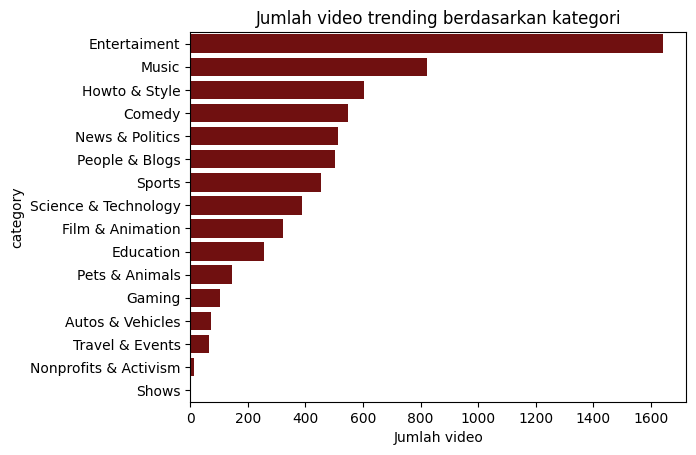

In [79]:
sns.barplot(top_cat,x='title',y='category',orient='h',color='maroon')
plt.title('Jumlah video trending berdasarkan kategori')
plt.xlabel('Jumlah video')


Berdasarkan grafik di atas, kategori terpopuler di Amerika Serikat (selanjutnya disingkat US) berdasarkan jumlah video adalah Entertaiment dengan jumlah video 2 kali lebih banyak dari kategori terpopuler kedua. Kategori terpopuler kedua adalah Music dan Howto & Style ketiga. kategori yang paling rendah ialah kategori Shows.

**Berdasarkan engangement: views, likes, & dislikes**

Sekarang mari kita lihat dari sisi engangement, ada beberapa pertanyaan yang ingin kita jawab:
- Berapa rata-rata views per video tiap kategori?
- kategori manakah yang memiliki rata-rata views teringgi?
- kategori manakah yang memiliki rata-rata views terendah?

pertama mari kita lihat rata-rata views tiap kategori.

In [80]:
avg_vid_cat=df.groupby('category').mean()
avg_vid_cat.reset_index(inplace=True)
avg_vid_cat.sort_values('views',inplace=True,ascending=False)
avg_vid_cat['views']=avg_vid_cat['views'].astype(int)
avg_vid_cat[['category','views']]

C:\Users\User\AppData\Local\Temp\ipykernel_18160\2655474357.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_vid_cat=df.groupby('category').mean()


,category,views
7,Music,5957275
4,Film & Animation,2495590
5,Gaming,2309992
9,Nonprofits & Activism,2071528
3,Entertaiment,1741516
1,Comedy,1417300
0,Autos & Vehicles,1410721
14,Sports,1403959
10,People & Blogs,1335763
12,Science & Technology,1106543


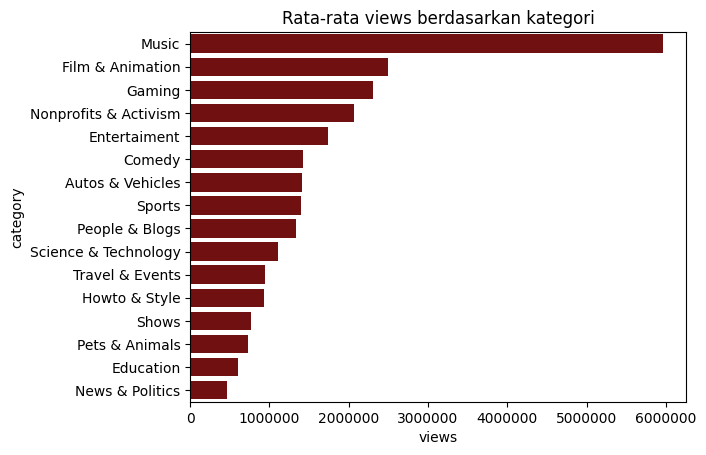

In [81]:
sns.barplot(avg_vid_cat,x='views',y='category',orient='h',color='maroon')
plt.title('Rata-rata views berdasarkan kategori')
plt.ticklabel_format(style='plain', axis="x")

Jika dilihat dari grafik di atas, bisa kita simpulkan bahwa di US kategori music memiliki rata-rata views per video tertinggi, sedangkan kategori entertaiment yang sebelumnya memiliki jumlah video tertinggi rata-rata viewnya hanya berada di kisaran 1.700.000 views. Music dapat memiliki views yang tinggi karena audiens cenderung mendengar video musik yang sama berulang kali. Di sisi lain kategori News & Politic memiliki rata-rata views terendah dengan rata-rata 450.000 views.


selanjutnya mari kita lihat dari sisi interaksi, pertama kita akan menggabungkan likes dan dislikes lalu melihat rata-rata berdasarkan kategori. Masalah yang ingin kita lihat sama dengan sebelumnya.

In [82]:
interaction=df[['category','likes','dislikes']]
interaction['interaction']=interaction['likes']+interaction['dislikes']
interaction=interaction.groupby('category').mean().sort_values('interaction',ascending=False)
interaction['interaction']=interaction['interaction'].astype(int)
interaction.reset_index(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18160\1855296153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interaction['interaction']=interaction['likes']+interaction['dislikes']


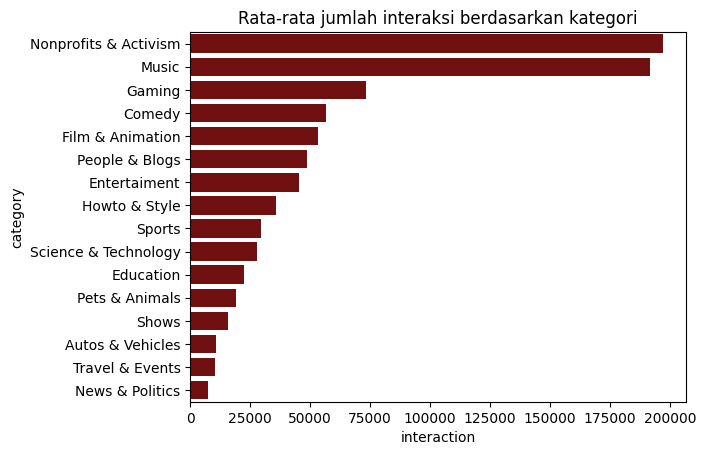

In [83]:
sns.barplot(interaction,x='interaction',y='category',orient='h',color='maroon')
plt.title('Rata-rata jumlah interaksi berdasarkan kategori')
plt.ticklabel_format(style='plain', axis="x")

Jika dilihat berdasarkan interaksi kembali ada perubahan peringkat, jika dalam jumlah views kategori music peringkat pertama, dari segi interaksi justru kategori nonprofit & activism yang menempati peringkat pertama diikuti oleh music di peringkat kedua.

Selanjutnya mari kita lihat dari comment count, 

In [84]:
avg_comment=pd.DataFrame(df.groupby('category')['comment_count'].mean().sort_values(ascending=False))
avg_comment.reset_index(inplace=True)

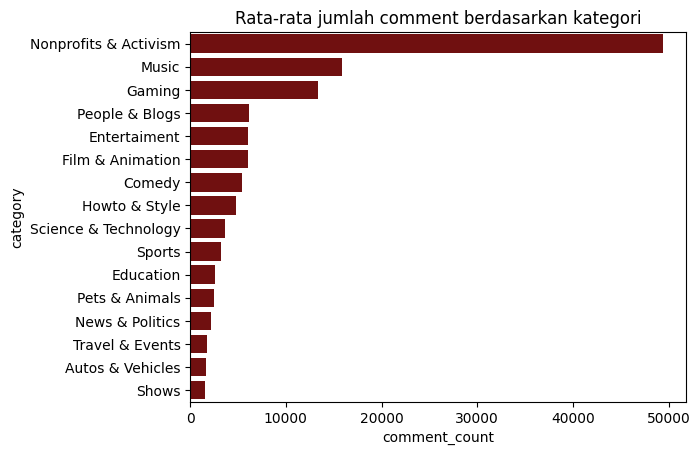

In [85]:
sns.barplot(avg_comment,x='comment_count',y='category',orient='h',color='maroon')
plt.title('Rata-rata jumlah comment berdasarkan kategori')
plt.ticklabel_format(style='plain', axis="x")

Ternyata untuk jumlah comment peringkat 3 teratasnya sama dengan berdasarkan jumlah interaksi. Namun jika kita ingat kembali dari jumlah video yang masuk ke trending, kategori 'Nonprofit & Activism hanya berjumlah sedikit, jadi mari kita lihat lebih detail tentang kategori ini.

Text(0.5, 1.0, 'Sebaran video nonprofit berdasarkan interaksi dan comment')

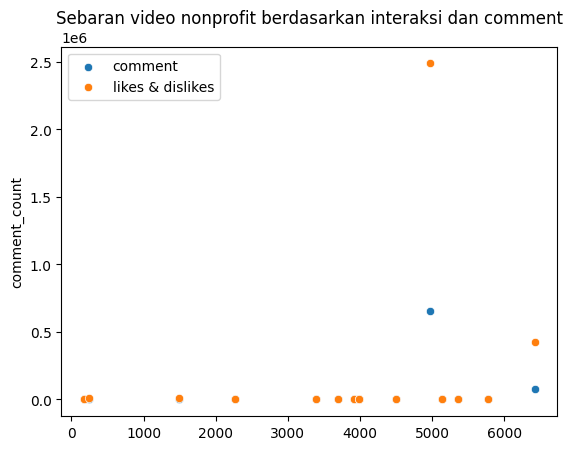

In [86]:
nonprofit=df[df['category']=='Nonprofits & Activism']
sns.scatterplot(nonprofit['comment_count'])
sns.scatterplot(nonprofit['likes']+nonprofit['dislikes'])
plt.legend(['comment','likes & dislikes'])
plt.title('Sebaran video nonprofit berdasarkan interaksi dan comment')

Ternyata dalam kategori 'Nonprofits & Activism' terindikasi adanya outlier dimana ada satu video yang jumlah likes, dislikes, dan commentnya sangat tinggi dibandingkan video lain dengan kategori yang sama. Sehingga untuk rata-rata jika outlier tersebut kita keluarkan kemungkinan peringkatnya akan lebih rendah. Jadi bisa kita asumsikan peringkat musik masih menempati peringkat 1 dari segi rata-rata per video untuk likes, dislikes, dan comment_count.

Outlier dalam dataset ini muncul bukan karena kesalahan pengisian ataupun pengukuran tetapi murni data yang terjadi saat data dikumpulkan. 

**Berdasarkan pengaturan comment dan description**

Pertama mari kita lihat dari pengaturan comment. Pemilik channel bisa memutuskan apakah video yang diupload memiliki atau menampilkan kolom komentar yang bisa diakses oleh penonton. Walaupun nilainya kecil, comment merupakan salah satu aspek yang termasuk ke dalam engangement. Ada beberapa masalah yang ingin kita jawab:
- Apakah ada video trending yang tidak menampilkan kolom komentar?
- Jika ada berapa persentase proporsinya?

In [87]:
data=df.groupby('comments_disabled').count()
label=['True','False']
label=list(label)
data=[110,6345]


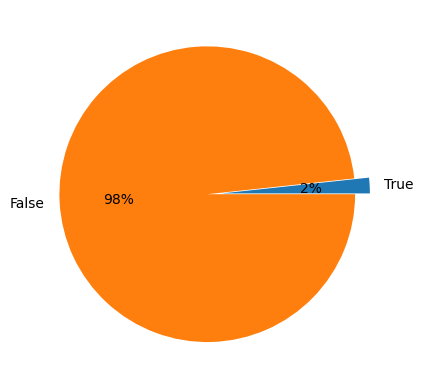

In [88]:

plt.pie(data,labels=label,explode=[0.1,0,],autopct='%.0f%%')
plt.show()

Jika dilihat dari pie chart diatas ternyata ada video yang memasuki trending page Youtube tanpa memiliki kolom komentar walaupun proporsinya sedikit hanya sekitar 2% dari total seluruh video. Bisa disimpulkan bahwa mayoritas video yang masuk ke trending page adalah video yang menampilkan kolom komentar.

Selanjutnya mari kita lihat dari segi description, description berisi tentang penjelasan video serta keyword yang dapat membantu viewer untuk menemukan video lebih mudah melalui kolom pencarian. Sekarang pertanyaannya adalah:
- Apakah ada video yang memasuki trending youtube tanpa mengisi description?
- Jika ada, bagaimana proporsi video yang mengisi description dan tidak?

In [89]:
data=df.groupby('description').count()
label=['True','False']
label=list(label)
data=[6355,100]


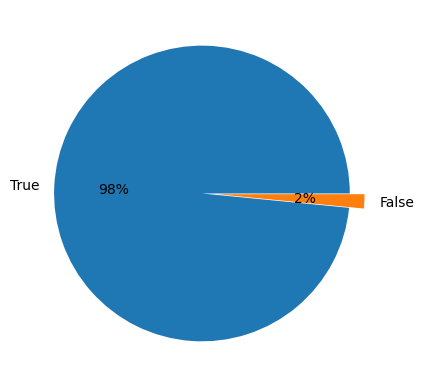

In [90]:
plt.pie(data,labels=label,explode=[0.1,0,],autopct='%.0f%%')
plt.show()

Sama dengan pengaturan comment, terdapat video yang tidak mengisi description trending page youtube, namun proporsinya juga sama hanya 2% dari keseluruhan.


**Berdasarkan jangka waktu antara publish dan trending**

<Axes: xlabel='range_to_trend', ylabel='category'>

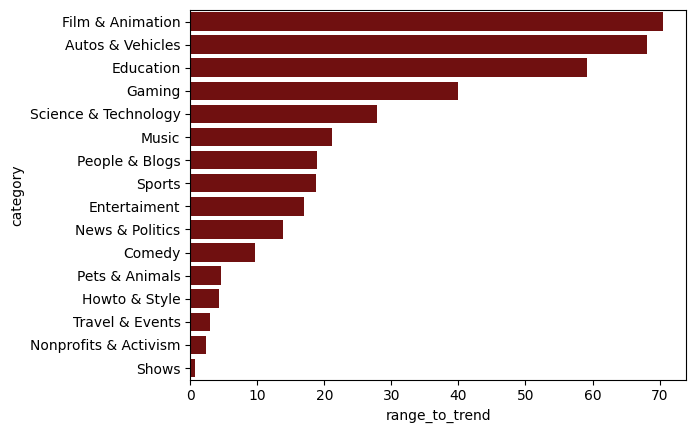

In [91]:
rng_pub_tre=pd.DataFrame(df.groupby('category')['range_to_trend'].mean())
rng_pub_tre.reset_index(inplace=True)
rng_pub_tre=rng_pub_tre.sort_values('range_to_trend',ascending=False)
sns.barplot(rng_pub_tre,x='range_to_trend',y='category',orient='h',color='maroon')

Jika melihat dari jangka waktu antara publish ke trending, kategori 'Film & Animation' memiliki rata-rata waktu terlama untuk mencapai trending sedangkan kategori tercepat adalah kategori 'Shows'. 


**Berdasarkan lama waktu video menempati trending**

<Axes: xlabel='lama_trending', ylabel='category'>

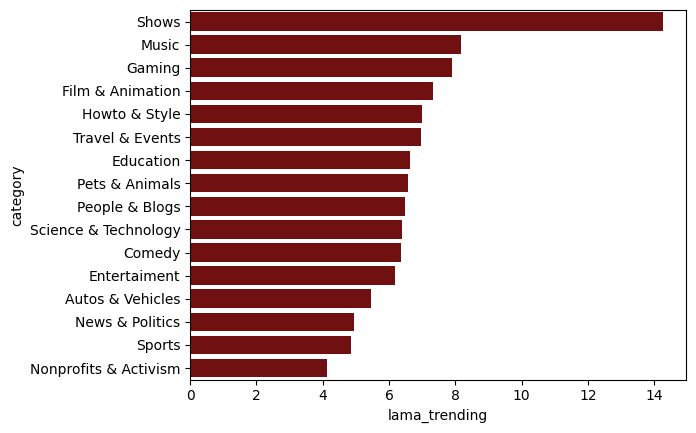

In [92]:
lma_trend=pd.DataFrame(df.groupby('category')['lama_trending'].mean())
lma_trend.reset_index(inplace=True)
lma_trend.sort_values('lama_trending',ascending=False,inplace=True)
sns.barplot(lma_trend,x='lama_trending',y='category',orient='h',color='maroon')

Kategori video dengan rata-rata terlama ialah kategori'Shows' namun perlu diingat bahwa jumlah video dengan kategori 'Shows' sangat sedikit hanya 4 video, sedangkan kategori 'Music' memiliki rata-rata waktu kedua terlama yaitu 8 hari, dengan rata-rata paling singkat yaitu 'Nonprofit & Activism'

**Waktu terbaik untuk upload**

Disini kita akan mencoba melihat pukul berapa suatu video diupload ke Youtube. Ada beberapa masalah yang ingin kita jawab:
- Pukul berapa mayoritas video di upload ke Youtube?
- Kapankah waktu terbaik untuk mengupload video ke Youtube? 

<Axes: xlabel='title', ylabel='publish_time'>

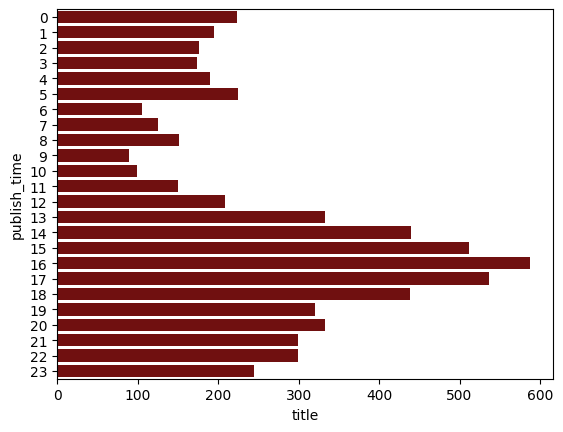

In [93]:
best_time=pd.DataFrame(df.groupby([df['publish_time'].dt.hour])['title'].count())
best_time.reset_index(inplace=True)
best_time.sort_values('title',ascending=False,inplace=True)
sns.barplot(best_time,x='title',y='publish_time',orient='h',color='maroon')

Berdasarkan grafik di atas, video yang trending bisa di upload kapan saja 24 jam, tapi mayoritas berada di rentang waktu antara pukul 2 siang hingga 6 malam. Tapi bisa kita asumsikan bahwa waktu terbaik untuk mengupload video di US adalah pukul 4 sore.

**Berdasarkan banyak tag**

Tag atau keyword berperan penting agar sebuah video lebih mudah ditemukan di kolom pencarian Youtube. Masalah yang ingin kita jawab ialah:
- Apakah semakin banyak tags video semakin mudah ditemukan?
- Apakah semakin sedikit tags video jadi sulit ditemukan?

<Axes: xlabel='title', ylabel='len_tags'>

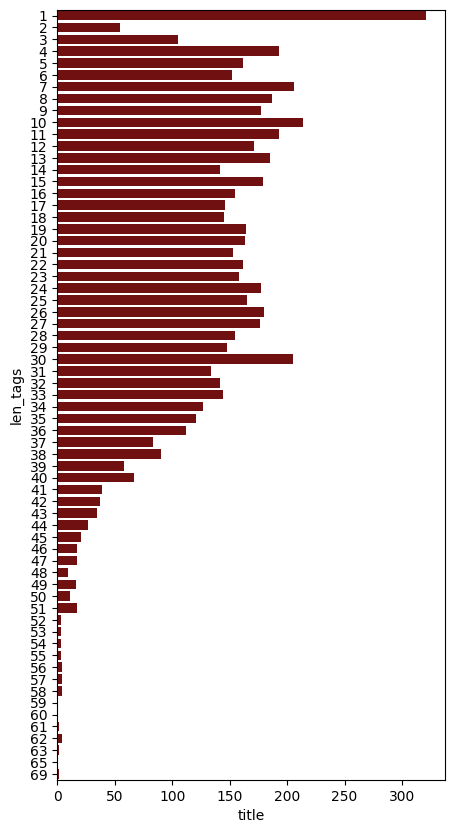

In [94]:
uptags=pd.DataFrame(df.groupby('len_tags')['title'].count())
uptags.reset_index(inplace=True)
uptags.sort_values('title',ascending=False,inplace=True)
plt.figure(figsize=(5,10))
sns.barplot(uptags,x='title',y='len_tags',orient='h',color='maroon')

Dari grafik di atas, jumlah tag dengan video paling banyak ialah 1, sedangkan semakin banyak tag justru semakin sedikit video yang memasuki trending. Bisa kita simpulkan bahwa jumlah keyword/tag yang banyak tidak membuat video lebih mudah ditemukan, justru video dengan jumlah tag seimbang dan sedikit lebih banyak masuk ke trending.

## **Kesimpulan dan Rekomendasi**

Dari analisis di atas, ada beberapa kesimpulan yang dapat kita ambil dari video yang masuk trending page Youtube US:
- Kategori 'Entertaiment' memiliki jumlah video terbanyak dengan yang paling sedikit adalah kategori 'Show'
- Kategori 'Music' memiliki rata-rata views tertinggi.
- Kategori 'Music' juga memiliki rata-rata interaksi (likes+dislikes) serta comment tertinggi
- Mayoritas video di trending page Youtube mengaktifkan kolom komentar
- Mayoritas video di trending page Youtube mengisi kolom deskripsi
- Kategori 'Shows' memiliki rata-rata waktu terlama menempati trending diikuti oleh 'Music'
- Jumlah tag yang banyak tidak terlalu mempengaruhi trending video.
- Waktu terbaik untuk mengupload video adalah antara pukul 2 siang hingga 6 malam.


Rekomendasi:
- Pembuatan video hendaknya menggunakan kategori entertaiment dengan menggabungkan topik musik sehingga dapat menghasilkan interaksi yang tinggi.
- Kolom komentar sebaiknya diaktifkan untuk mendapatkan interaksi serta berfungsi sebagai feedback dari sebuah video
- Video sebaiknya memiliki deskripsi yang diisi dengan Judul yang unik, penjelasan video, serta tag yang dapat membantu video mudah ditemukan.
- Jumlah tags yang banyak tidak menjamin video menjangkau banyak orang, lebih baik fokus membuat tag yang unik dan berkualitas.
- Video sebaiknya diupload dalam rentang pukul 2 siang hingga 6 malam, lebih baik lagi saat pukul 4 sore.